# Load an analyze data

### Adèle Gillier and Adrien Le Franc
### Challenge data ENS

In [1]:
import numpy as np
import pandas as pd
import math
import time
import codecs
import re
import itertools as it
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('..')

import data
import features_adele

In [2]:
outside_temp, data_dico = data.load_input_data("./../data/train_input.csv")
output_dico = data.load_output_data('./../data/challenge_output.csv', outside_temp, data_dico)

len_year = len(outside_temp)
buildings = list(data_dico.keys())

** Variables:**
* **dico**: dictionnaire avec pour chaque nom de batiment les paramètres de réglages ayant subi un premier traitement. dico['buildings] = liste de tous les noms de building
* **outside_temp**: outside temperature
* **output**: dictionnaire avec pour chaque nom de batiment les données à prédire. Le champs 'fields' contient les noms des 5 outputs:

**Outputs**:
* 0: office_temperature_degreC
* 1: Q_total_heating_kW
* 2: Q_total_AC_kW
* 3: Q_total_gains_kW
* 4: Q_total_kW

In [3]:
print("{} buildings in the train dataset".format(len(buildings)))
print("{} parameters by building \n\nThe variables are:".format(len(data_dico['building_10_0'].keys())))
print(list(data_dico['building_10_0'].keys()))

241 buildings in the train dataset
46 parameters by building 

The variables are:
['ventilation_week_hours', 'ventilation_week_ONif1', 'AC_week_hours', 'AC_week_temperatures_degreC', 'AC_WE_hours', 'AC_WE_temperatures_degreC', 'AC_monday_hours', 'AC_monday_temperatures_degreC', 'heating_week_hours', 'heating_week_temperatures_degreC', 'heating_WE_hours', 'heating_WE_temperatures_degreC', 'heating_monday_hours', 'heating_monday_temperatures_degreC', 'thickness_ground_m', 'thickness_outwall_m', 'thickness_intwall_m', 'thickness_intfloor_m', 'thickness_roof_m', 'airchange_infiltration_m3perh', 'airchange_ventilation_m3perh', 'AC_power_kW', 'heating_power_kW', 'window_percent_1_outwall', 'surface_1_m2_OUTW', 'window_percent_2_outwall', 'surface_2_m2_OUTW', 'window_percent_3_outwall', 'surface_3_m2_OUTW', 'surface_m2_GROU', 'surface_m2_ROOF', 'window_percent_4_outwall', 'surface_4_m2_OUTW', 'surface_m2_INTW', 'nb_occupants', 'nb_PCs', 'PCs_percent_on_night_WE', 'light_percent_on_night_WE', 

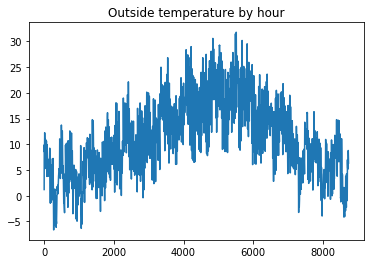

In [4]:
plt.plot(outside_temp)
plt.title('Outside temperature by hour')
plt.show()

# Analyse des outputs

In [5]:
def plot_output_var(name_var, name_building='building_10_0'):
    num_var = output_dico['fields'][name_var]
    plt.plot(output_dico[name_building][: ,num_var])
    plt.title(name_var)
    plt.xlabel('Hour')
    plt.show()

### 1. office_temperature_degreC :  inside temperatures

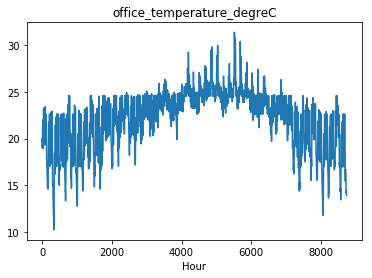

In [6]:
plot_output_var('office_temperature_degreC')

** Remarques:**
* Une sorte de palier à 25 en dehors de l'été ?? -> il semblerait que le chauffage soit max à 25, et cette température n'est dépassée que si la température extérieure est élevée

### 2. Q_total_heating_kW : heating consumptions

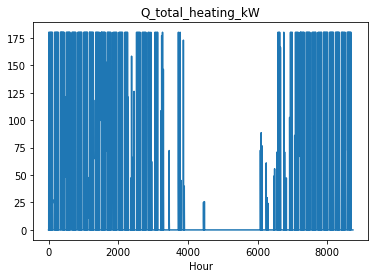

In [7]:
plot_output_var('Q_total_heating_kW')

In [8]:
print("Min:", np.min(output_dico['building_10_0'][output_dico['fields']['Q_total_heating_kW']]))
print("Max:", np.max(output_dico['building_10_0'][output_dico['fields']['Q_total_heating_kW']]))

Min: 0.0
Max: 212.92876


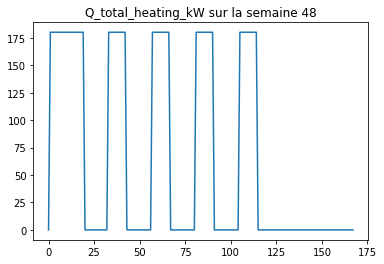

In [9]:
## Sur une semaine
num_building = 'building_3_3'

num_sem = 48
plt.plot(output_dico[num_building][num_sem*7*24:(num_sem+1)*7*24, output_dico['fields']['Q_total_heating_kW']])
plt.title('Q_total_heating_kW sur la semaine {}'.format(num_sem))
plt.show()

** Remarques**:
* Variable comprise entre 0 et 180.09
* Fonctionne par palier

### 3. Q_total_AC_kW : AC consumptions

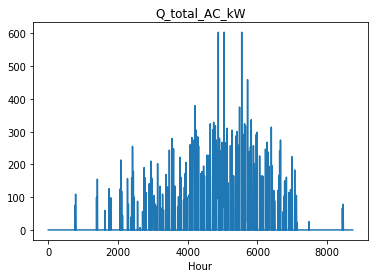

In [10]:
plot_output_var('Q_total_AC_kW')

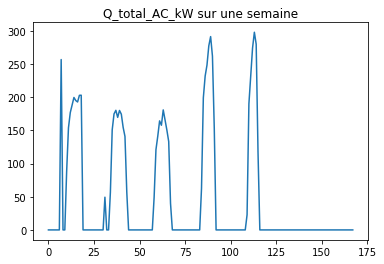

In [44]:
## Sur une semaine
num_sem = 35
plt.plot(output_dico['building_10_0'][num_sem*7*24:(num_sem+1)*7*24, output_dico['fields']['Q_total_AC_kW']])
plt.title('Q_total_AC_kW sur une semaine')
plt.show()

### 4. Q_total_gains_kW  : free heating from lighting, people etc...

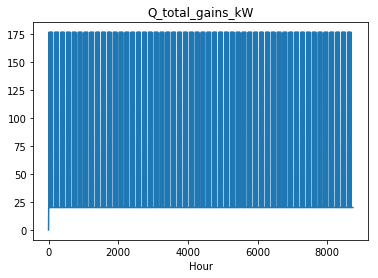

In [12]:
plot_output_var('Q_total_gains_kW')

In [13]:
np.unique(output_dico['building_10_0'][:, output_dico['fields']['Q_total_gains_kW']])

array([   0.     ,   20.03876,  176.7376 ])

**Que trois valeurs possibles!**

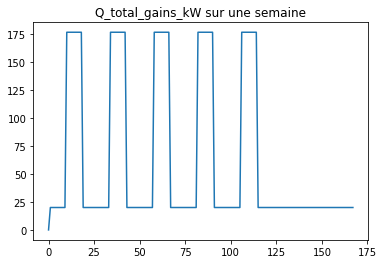

In [14]:
plt.plot(output_dico['building_10_0'][:7*24, output_dico['fields']['Q_total_gains_kW']])
plt.title('Q_total_gains_kW sur une semaine')
plt.show()

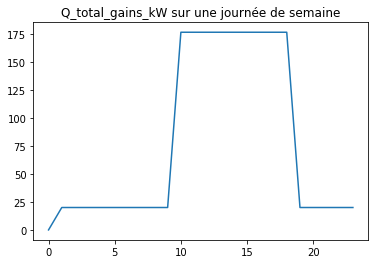

In [15]:
plt.plot(output_dico['building_10_0'][:24, output_dico['fields']['Q_total_gains_kW']])
plt.title('Q_total_gains_kW sur une journée de semaine')
plt.show()

In [16]:
print(output_dico['building_10_0'][0, output_dico['fields']['Q_total_gains_kW']])
values = np.unique(output_dico['building_10_0'][1:, output_dico['fields']['Q_total_gains_kW']])

only_2_values = len(values) == 2
for building in buildings:
    if len(np.unique(output_dico['building_10_0'][1:, output_dico['fields']['Q_total_gains_kW']])) != 2\
       and output_dico['building_10_0'][0, output_dico['fields']['Q_total_gains_kW']] == 0:
        only_2_values = False

if only_2_values:
    print("Valeurs possibles:", values)

0.0
Valeurs possibles: [  20.03876  176.7376 ]


Il n'y a en fait **que deux valeurs possibles pour la variables 'Q_total_gains_kW'** si l'on ne regarde pas la toute première valeur qui vaut elle 0.

### 5. Q_total_kW : total consumption

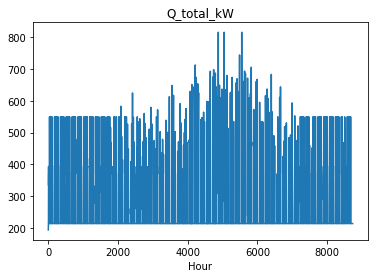

In [17]:
plot_output_var('Q_total_kW')

In [18]:
output_dico['fields']

{'Q_total_AC_kW': 2,
 'Q_total_gains_kW': 3,
 'Q_total_heating_kW': 1,
 'Q_total_kW': 4,
 'office_temperature_degreC': 0}

In [19]:
np.all(output_dico['building_10_0'][1:, 4] == output_dico['building_10_0'][:, 1] + \
                                                     output_dico['building_10_0'][:, 2])

D:\Programmes\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

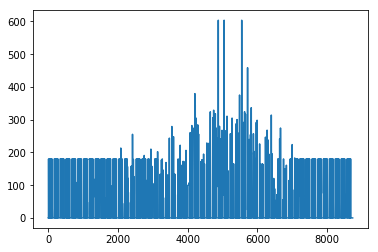

In [20]:
test = output_dico['building_10_0'][:, 1] + output_dico['building_10_0'][:, 2]
plt.plot(test)
plt.show()

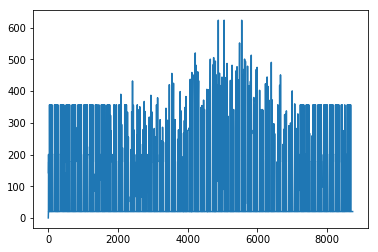

In [21]:
test2 = output_dico['building_10_0'][:, 1] + output_dico['building_10_0'][:, 2] + output_dico['building_10_0'][:, 3]
plt.plot(test2)
plt.show()

[]

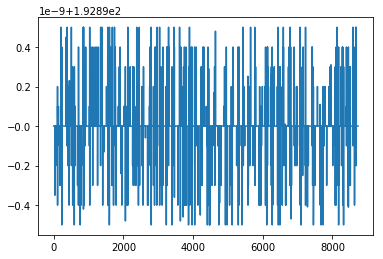

In [22]:
diff = output_dico['building_10_0'][:, 4] - test2
plt.plot(diff)
plt.plot()

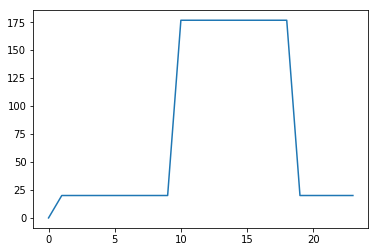

In [23]:
plt.plot(output_dico['building_10_0'][:24, 3])

In [24]:
np.unique(output_dico['building_10_0'][:, 3])

array([   0.     ,   20.03876,  176.7376 ])

# Arret du chauffage en été

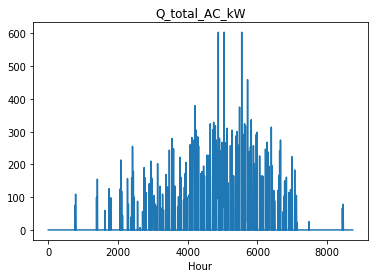

In [25]:
plot_output_var('Q_total_AC_kW')

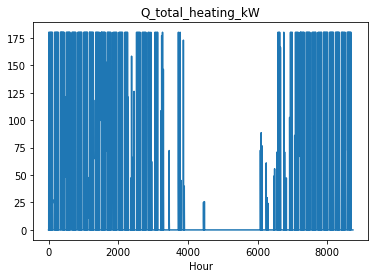

In [26]:
plot_output_var('Q_total_heating_kW')

# Consommation en clim et chauffage le WE

In [111]:
def hour_is_we(i, name_building=None):
    num_jour = i // 24  # commence a 0
    return (num_jour % 7 == 5) or (num_jour % 7 == 6)

def test_conso_var_period(output_var, period_function, name_period=''):
    ind_output = output_dico['fields'][output_var]
    values = []

    for name_building in tqdm(data_dico['buildings']):
        values += [output_dico[name_building][i, ind_output]
                   for i in range(len(outside_temp)) if period_function(i, name_building)]
        
    if len(np.unique(values)) == 1:
        print("La variable {} est NULLE en periode {} pour les {} réglages d'immeubles".format(
            output_var, name_period, len(data_dico['buildings'])))
    else:
        print("La variable {} n'est pas toujours nulle en periode {} pour les {} réglages d'immeubles".format(
            output_var, name_period, len(data_dico['buildings'])))
    
    return values

In [122]:
_ = test_conso_var_period('Q_total_AC_kW', hour_is_we, name_period='WE')
_ = test_conso_var_period('Q_total_heating_kW', hour_is_we, name_period='WE')
_ = test_conso_var_period('Q_total_kW', hour_is_we, name_period='WE')
_ = test_conso_var_period('Q_total_gains_kW', hour_is_we, name_period='WE')

100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 373.71it/s]


La variable Q_total_AC_kW est NULLE en periode WE pour les 240 réglages d'immeubles


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 374.87it/s]


La variable Q_total_heating_kW est NULLE en periode WE pour les 240 réglages d'immeubles


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 366.26it/s]


La variable Q_total_kW n'est pas toujours en periode WE pour les 240 réglages d'immeubles


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 340.47it/s]


La variable Q_total_gains_kW n'est pas toujours en periode WE pour les 240 réglages d'immeubles


# Conso en clim aux heures où la clim est reglée au dessus de 28

In [29]:
all_features = features_adele.load_all_features(data_dico, outside_temp)

100%|████████████████████████████████████████████████████████████████████████████████| 240/240 [00:09<00:00, 25.39it/s]


All the features have been loaded in 9.47 sec


In [109]:
def clim_over_seuil(i, name_building, seuil=29):
    result = all_features[name_building]['AC_value'][i] > seuil
    return result

def clim_over_seuil(i, name_building, seuil=29):
    result = all_features[name_building]['AC_value'][i] > seuil
    return result

In [110]:
values_AC = test_conso_var_period('Q_total_AC_kW', lambda i, x: clim_over_seuil(i, x, 29), name_period='AC_value > 29')

100%|████████████████████████████████████████████████████████████████████████████████| 240/240 [00:30<00:00,  7.97it/s]


La variable Q_total_AC_kW est NULLE en periode AC_value > 29 pour les 240 réglages d'immeubles


In [112]:
values_AC = test_conso_var_period('Q_total_AC_kW', lambda i, x: clim_over_seuil(i, x, 29), name_period='AC_value > 27')
values_AC = test_conso_var_period('Q_total_AC_kW', lambda i, x: clim_over_seuil(i, x, 29), name_period='AC_value > 28')

100%|████████████████████████████████████████████████████████████████████████████████| 240/240 [00:25<00:00,  9.45it/s]


La variable Q_total_AC_kW est NULLE en periode AC_value > 27 pour les 240 réglages d'immeubles


100%|████████████████████████████████████████████████████████████████████████████████| 240/240 [00:25<00:00,  9.26it/s]


La variable Q_total_AC_kW est NULLE en periode AC_value > 28 pour les 240 réglages d'immeubles


In [120]:
values_AC = test_conso_var_period('Q_total_AC_kW', lambda i, x: clim_over_seuil(i, x, 20), name_period='AC_value > 20')

100%|████████████████████████████████████████████████████████████████████████████████| 240/240 [00:26<00:00,  9.15it/s]


La variable Q_total_AC_kW n'est pas toujours en periode AC_value > 20 pour les 240 réglages d'immeubles
